## 📋 미션 3: 직원 만족도 종합 분석 🏢

### 🎯 학습 목표

상관관계, 회귀분석, 로지스틱 회귀를 실전에서 종합적으로 활용하기

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from scipy import stats

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt

# 한글 폰트 설정
plt.rc('font', family='Malgun Gothic')  # 윈도우용


In [ ]:
# 직원 만족도 종합 데이터 생성
np.random.seed(2024)
n = 250

data_hr = {
    '연봉': np.random.lognormal(np.log(50000), 0.3, n),
    '근무연수': np.random.exponential(3, n),
    '부서': np.random.choice(['영업', '개발', '마케팅', '인사'], n, p=[0.3, 0.4, 0.2, 0.1]),
    '교육시간': np.random.gamma(2, 10, n),
    '직급': np.random.choice(['사원', '대리', '과장', '부장'], n, p=[0.4, 0.3, 0.2, 0.1])
}

df_hr = pd.DataFrame(data_hr)

# 만족도 점수 (1-10점) 생성
satisfaction_base = (
    df_hr['연봉']/10000 * 0.8 +
    df_hr['근무연수'] * 0.3 +
    df_hr['교육시간'] * 0.1
)

dept_effect = df_hr['부서'].map({'영업': -0.5, '개발': 0.8, '마케팅': 0.3, '인사': 0.0})
rank_effect = df_hr['직급'].map({'사원': 0, '대리': 0.5, '과장': 1.0, '부장': 1.5})

satisfaction = satisfaction_base + dept_effect + rank_effect + np.random.normal(0, 0.8, n)
satisfaction = np.clip(satisfaction, 1, 10)

# 이직 의향
turnover_prob = 1 / (1 + np.exp(satisfaction - 5)) 

#로지스틱 함수란? 
# 연속적인 입력값(x)을 확률로 바꿔주는 함수
# 범위는 항상 0 ~ 1 사이!

turnover_intent = np.random.binomial(1, turnover_prob, n)

df_hr['만족도'] = satisfaction.round(1)
df_hr['이직의향'] = turnover_intent

print("📊 직원 만족도 데이터 (처음 5개 행)")
print(df_hr.head())


📊 직원 만족도 데이터 (처음 5개 행)
             연봉      근무연수   부서       교육시간  직급   만족도  이직의향
0  82470.215328  5.843045   개발   4.431883  과장  10.0     0
1  62378.915363  1.803688   개발   1.373603  대리   8.2     0
2  47066.508609  0.211051  마케팅  17.196300  과장   7.6     0
3  47786.798588  4.785220   개발  49.198119  과장  10.0     0
4  65814.392648  2.060981   영업  18.363062  사원   9.1     0


### ✅ **문제 3-1: 상관관계 매트릭스 만들기** 🔍

**🤔 해야할 일:** 숫자형 변수들 간의 상관관계를 확인해보세요.

In [3]:
# TODO: 숫자형 변수들만 선별하기
numeric_cols = ['연봉', '근무연수', '교육시간', '만족도', '이직의향']
correlation_data = df_hr[numeric_cols]

# TODO: 상관계수 매트릭스 계산하기
correlation_matrix = correlation_data.corr()

print("📊 상관계수 매트릭스")
print(correlation_matrix.round(3))


📊 상관계수 매트릭스
         연봉   근무연수   교육시간    만족도   이직의향
연봉    1.000  0.101 -0.003  0.567 -0.265
근무연수  0.101  1.000 -0.062  0.389 -0.130
교육시간 -0.003 -0.062  1.000  0.484 -0.276
만족도   0.567  0.389  0.484  1.000 -0.534
이직의향 -0.265 -0.130 -0.276 -0.534  1.000


### ✅ **문제 3-2: 만족도와의 상관관계 분석하기** 🎯

**🤔 해야할 일:** 어떤 변수가 만족도와 가장 관련이 높은지 찾아보세요.

In [5]:
# TODO: 만족도와의 상관관계만 추출하기
satisfaction_corr = correlation_matrix['만족도'].sort_values(ascending=False)

print("🎯 만족도와의 상관관계 (높은 순)")

# TODO: for문으로 각 변수별 상관관계 출력하기
for var, corr in satisfaction_corr.items():
    if var != '만족도':  # 만족도 자기 자신 제외
        # TODO: 상관관계 강도 판단하기
        if abs(corr) > 0.5:
            strength = "강한"
        elif abs(corr) > 0.3:
            strength = "중간"
        else:
            strength = "약한"

        direction = "양의" if corr > 0 else "음의"
        print(f"• {var}: {corr:.3f} ({strength} {direction} 상관관계)")


🎯 만족도와의 상관관계 (높은 순)
• 연봉: 0.567 (강한 양의 상관관계)
• 교육시간: 0.484 (중간 양의 상관관계)
• 근무연수: 0.389 (중간 양의 상관관계)
• 이직의향: -0.534 (강한 음의 상관관계)


### ✅ **문제 3-3: 상관관계 히트맵 그리기** 📈

**🤔 해야할 일:** 상관관계를 시각적으로 표현해보세요.

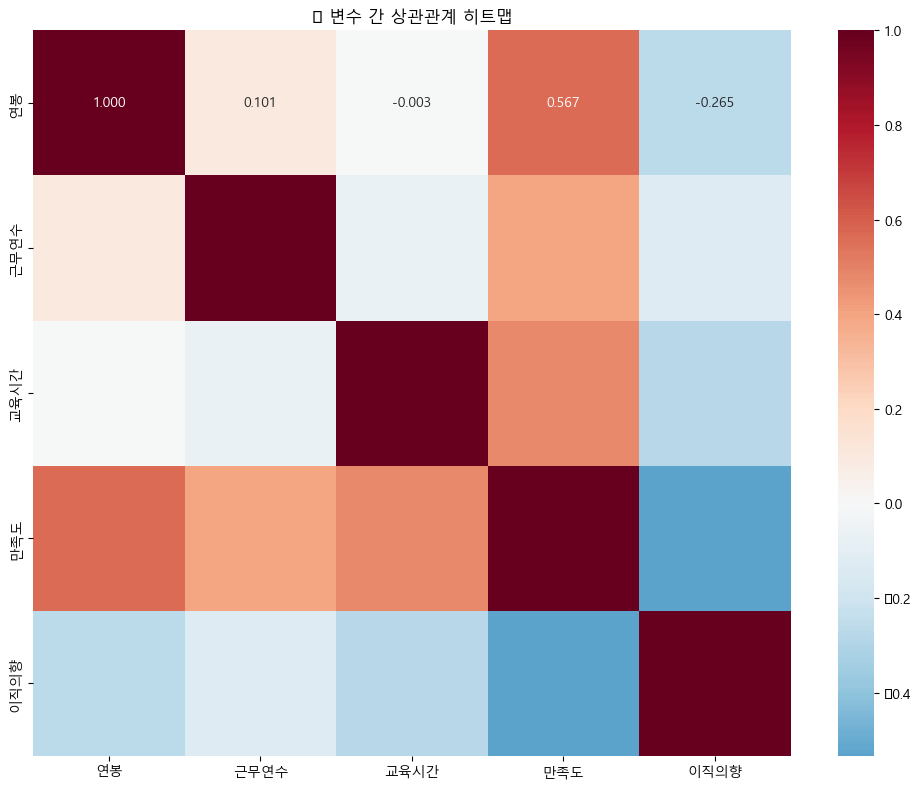

In [9]:
# TODO: 히트맵 그리기
plt.figure(figsize=(10, 8))

# TODO: seaborn heatmap 사용하기
# 힌트: sns.heatmap(data, annot=True, cmap='RdBu_r', center=0, fmt='.3f')
sns.heatmap( correlation_matrix, annot=True, cmap='RdBu_r', center=0, fmt='.3f' )  # 빈칸을 채우세요

plt.title('📊 변수 간 상관관계 히트맵')
plt.tight_layout()
plt.show()


### ✅ **문제 3-4: 부서별 만족도 비교하기** 🏢

**🤔 해야할 일:** 부서별로 만족도와 이직의향을 비교해보세요.

In [10]:
# TODO: 부서별 그룹화해서 평균 계산하기
dept_summary = df_hr.groupby('부서')['만족도'].mean()

print("🏢 부서별 평균 만족도")
print(dept_summary.round(2))

# TODO: 부서별 이직의향도 계산하기
dept_turnover = df_hr.groupby('부서')['이직의향'].mean()

print("\n🏢 부서별 이직의향")
print(dept_turnover.round(3))

# TODO: for문으로 부서별 상세 분석 출력하기
print("\n📋 부서별 상세 분석")
for dept in df_hr['부서'].unique():
    # TODO: 해당 부서 데이터만 필터링하기
    dept_data = df_hr[df_hr['부서'] == dept]

    satisfaction_avg = dept_data['만족도'].mean()
    turnover_avg = dept_data['이직의향'].mean()

    print(f"{dept}부: 만족도 {satisfaction_avg:.1f}점, 이직의향 {turnover_avg:.1%}")


🏢 부서별 평균 만족도
부서
개발     7.76
마케팅    7.82
영업     6.96
인사     6.93
Name: 만족도, dtype: float64

🏢 부서별 이직의향
부서
개발     0.139
마케팅    0.208
영업     0.276
인사     0.278
Name: 이직의향, dtype: float64

📋 부서별 상세 분석
개발부: 만족도 7.8점, 이직의향 13.9%
마케팅부: 만족도 7.8점, 이직의향 20.8%
영업부: 만족도 7.0점, 이직의향 27.6%
인사부: 만족도 6.9점, 이직의향 27.8%


### ✅ **문제 3-5: 더미 변수 생성하기** 🔧

**🤔 해야할 일:** 회귀분석을 위해 범주형 변수를 더미 변수로 변환하세요.

In [12]:
# TODO: 부서를 더미 변수로 변환하기
dept_dummies = pd.get_dummies(df_hr['부서'], prefix='부서')

# TODO: 직급을 더미 변수로 변환하기
rank_dummies = pd.get_dummies(df_hr['직급'], prefix='직급')

# TODO: 기준 카테고리 제거하기 (다중공선성 방지)
dept_dummies = dept_dummies.drop('부서_인사', axis=1)
rank_dummies = rank_dummies.drop('직급_사원', axis=1)

print("생성된 더미 변수들:")
print("부서:", list(dept_dummies.columns))
print("직급:", list(rank_dummies.columns))


생성된 더미 변수들:
부서: ['부서_개발', '부서_마케팅', '부서_영업']
직급: ['직급_과장', '직급_대리', '직급_부장']


### ✅ **문제 3-6: 회귀분석용 데이터 준비하기** 🔧

**🤔 해야할 일:** 독립변수와 종속변수를 준비하세요.

In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# TODO: 독립변수 데이터프레임 만들기
X_vars = pd.concat([df_hr[['연봉', '근무연수', '교육시간']], dept_dummies, rank_dummies], axis=1)
# 힌트: df_hr[['연봉', '근무연수', '교육시간']]과 더미변수들을 합치세요

# TODO: 종속변수 설정하기
y_var = df_hr['만족도']

print("🔧 회귀분석 변수 구성")
print(f"독립변수 개수: {len(X_vars.columns)}개")
print(f"독립변수: {list(X_vars.columns)}")
print(f"종속변수: 만족도")


🔧 회귀분석 변수 구성
독립변수 개수: 9개
독립변수: ['연봉', '근무연수', '교육시간', '부서_개발', '부서_마케팅', '부서_영업', '직급_과장', '직급_대리', '직급_부장']
종속변수: 만족도


### ✅ **문제 3-7: 회귀분석 실행하기** 📊

**🤔 해야할 일:** 다중회귀분석을 실행하고 R²을 계산하세요.

In [16]:
# TODO: 회귀모델 생성 및 학습하기
model = LinearRegression()

model.fit(X_vars, y_var ) 

# TODO: 예측값 계산하기
y_pred = model.predict(X_vars)

# TODO: R² 계산하기
r2 = r2_score(y_var, y_pred)

print("📊 다중회귀분석 결과")
print(f"R² (설명력): {r2:.3f} ({r2*100:.1f}%)")


📊 다중회귀분석 결과
R² (설명력): 0.800 (80.0%)


### ✅ **문제 3-8: 회귀계수 해석하기** 🔍

**🤔 해야할 일:** 어떤 변수가 만족도에 가장 큰 영향을 미치는지 찾아보세요.

In [ ]:
# TODO: 회귀계수를 데이터프레임으로 정리하기
coefficients = pd.DataFrame({
    '변수': X_vars.columns,
    '계수': model.coef_,            #모델의 회귀계수. 이 값은 해당 변수의 영향력을 수치로 나타낸 것
    '절댓값': np.abs(model.coef_)
})

# TODO: 절댓값 기준으로 정렬하기
coefficients = coefficients.sort_values('절댓값', ascending=False)

print("🔍 회귀계수 분석 (영향력 순)")
print(coefficients.head(5))  # 상위 5개만 출력

# TODO: 가장 영향력이 큰 변수 찾기
most_important = coefficients.iloc[0]
print(f"\n가장 영향력이 큰 변수: {most_important['변수']} (계수: {most_important['계수']:.3f})")


🔍 회귀계수 분석 (영향력 순)
      변수        계수       절댓값
8  직급_부장  1.393631  1.393631
6  직급_과장  0.764017  0.764017
3  부서_개발  0.497000  0.497000
5  부서_영업 -0.496424  0.496424
7  직급_대리  0.325535  0.325535

가장 영향력이 큰 변수: 직급_부장 (계수: 1.394)


### ✅ **문제 3-9: 로지스틱 회귀 데이터 준비하기** 🎯

**🤔 해야할 일:** 이직 의향을 예측하기 위한 로지스틱 회귀를 준비하세요.

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# TODO: 로지스틱 회귀용 독립변수와 종속변수 설정하기
X_logistic = X_vars 
y_logistic = df_hr['이직의향']

# TODO: 현재 이직 의향 현황 파악하기
turnover_summary = df_hr['이직의향'].value_counts()
turnover_rate = df_hr['이직의향'].mean()

print("📊 현재 이직 의향 현황")
print(f"이직 의향 있음: {turnover_summary[1]}명 ({turnover_rate:.1%})")
print(f"이직 의향 없음: {turnover_summary[0]}명 ({1-turnover_rate:.1%})")


📊 현재 이직 의향 현황
이직 의향 있음: 51명 (20.4%)
이직 의향 없음: 199명 (79.6%)


### ✅ **문제 3-10: 로지스틱 회귀 모델 학습하기** 🤖

**🤔 해야할 일:** 로지스틱 회귀 모델을 학습시키고 예측을 수행하세요.

In [20]:
# TODO: 로지스틱 회귀 모델 생성하기
logistic_model = LogisticRegression(random_state=42, max_iter=1000)

# TODO: 모델 학습하기
logistic_model.fit(X_vars, y_logistic) 

# TODO: 이직 확률 예측하기
y_pred_proba = logistic_model.predict_proba(X_logistic)[:, 1]

# TODO: 이직 여부 예측하기 (0 또는 1)
y_pred_class = logistic_model.predict(X_logistic)

# TODO: 정확도 계산하기
accuracy = (y_pred_class == y_logistic).mean()

print("🤖 로지스틱 회귀 모델 성능")
print(f"정확도: {accuracy:.3f}")


🤖 로지스틱 회귀 모델 성능
정확도: 0.864


### ✅ **문제 3-11: 혼동 행렬 만들기** 📋

**🤔 해야할 일:** 모델의 예측 성능을 자세히 분석해보세요.

In [ ]:
# TODO: 혼동 행렬 계산하기
cm = confusion_matrix(y_logistic, y_pred_class)

print("📋 혼동 행렬")
print("실제 → 예측    이직안함  이직함")
print(f"이직 안함        {cm[0,0]:3d}    {cm[0,1]:3d}")
print(f"이직 함          {cm[1,0]:3d}    {cm[1,1]:3d}")

# TODO: 정밀도와 재현율 계산하기
# 정밀도 = TP / (TP + FP)       # 양성으로 예측한 것 중 진짜 양성인 비율, 양성은 이직 함 임
precision = cm[1,1] / (cm[1,1] + cm[0,1]) if (cm[1,1] + cm[0,1]) > 0 else 0

# 재현율 = TP / (TP + FN)       # 실제 양성 중 모델이 잘 잡아낸 비율
recall = cm[1,1] / (cm[1,1] + cm[1,0]) if (cm[1,1] + cm[1,0]) > 0 else 0

print(f"\n정밀도: {precision:.3f}")
print(f"재현율: {recall:.3f}")


📋 혼동 행렬
실제 → 예측    이직안함  이직함
이직 안함        193      6
이직 함           28     23

정밀도: 0.793
재현율: 0.451


### ✅ **문제 3-12: 오즈비 계산하기** 📈

**🤔 해야할 일:** 각 변수가 이직 확률에 미치는 영향을 분석하세요.

In [ ]:
# TODO: 오즈비 계산하기
# 힌트: 오즈비 = exp(회귀계수)
odds_ratios = np.exp(logistic_model.coef_[0])

# TODO: 오즈비 분석 데이터프레임 만들기
odds_analysis = pd.DataFrame({
    '변수': X_logistic.columns,
    '계수': logistic_model.coef_[0],
    '오즈비': odds_ratios,
    '위험도변화': [(or_val - 1) * 100 for or_val in odds_ratios] # 위험도 변화 (%)=(오즈비−1)×100
                                                                        # 변수 1단위 변화가 이직 오즈에 미치는 상대적 영향을 백분율로 표현한 지표   
})

# TODO: 위험도 변화가 큰 순으로 정렬하기
odds_analysis = odds_analysis.sort_values('위험도변화', key=abs, ascending=False)

print("🎯 이직 위험 요인 분석 (상위 5개)")
print(odds_analysis.head())


🎯 이직 위험 요인 분석 (상위 5개)
      변수        계수       오즈비      위험도변화
6  직급_과장 -0.981356  0.374803 -62.519741
8  직급_부장 -0.961496  0.382321 -61.767946
5  부서_영업  0.480365  1.616664  61.666393
3  부서_개발 -0.623779  0.535915 -46.408471
7  직급_대리 -0.598151  0.549827 -45.017286


해석 :
직급_과장은 이직할 오즈가 63프로 감소

직급_영업은 이직할 오즈가 1.61배 증가

계수가 음수인 변수는 “이직 위험 요인”이라기보단 → 이직 완화 요인 또는 보호 요인이라고 보는 게 더 정확합니다.

odds_analysis = odds_analysis.sort_values('위험도변화', key=abs, ascending=False) -> 영향력이 큰 요인 전체를 보고싶을 때

odds_analysis[odds_analysis['위험도변화'] > 0].sort_values('위험도변화', ascending=False) -> 위험요인만 뽑고싶을 때


In [ ]:
# 실제 이직 위험 요인 분석

# TODO: 오즈비 계산하기
# 힌트: 오즈비 = exp(회귀계수)
odds_ratios = np.exp(logistic_model.coef_[0])

# TODO: 오즈비 분석 데이터프레임 만들기
odds_analysis = pd.DataFrame({
    '변수': X_logistic.columns,
    '계수': logistic_model.coef_[0],
    '오즈비': odds_ratios,
    '위험도변화': [(or_val - 1) * 100 for or_val in odds_ratios] # 위험도 변화 (%)=(오즈비−1)×100
                                                                        # 변수 1단위 변화가 이직 오즈에 미치는 상대적 영향을 백분율로 표현한 지표   
})

# TODO: 위험도 변화가 큰 순으로 정렬하기
odds_analysis = odds_analysis.sort_values('위험도변화', ascending=False)

print("🎯 이직 위험 요인 분석 (상위 5개)")
print(odds_analysis.head())


🎯 이직 위험 요인 분석 (상위 5개)
       변수        계수       오즈비      위험도변화
5   부서_영업  0.480365  1.616664  61.666393
4  부서_마케팅  0.257317  1.293455  29.345529
0      연봉 -0.000069  0.999931  -0.006864
2    교육시간 -0.104454  0.900816  -9.918387
1    근무연수 -0.118023  0.888675 -11.132469


### ✅ **문제 3-13: 고위험군 식별하기** 🚨

**🤔 해야할 일:** 이직 확률이 높은 직원들을 찾아보세요.

In [24]:
# TODO: 고위험군 기준 설정하기 (70% 이상)
high_risk_threshold = 0.7

# TODO: 고위험군 직원 필터링하기
high_risk_mask = y_pred_proba > high_risk_threshold
high_risk_employees = df_hr[high_risk_mask]

print(f"🎯 이직 고위험군 식별")
print(f"이직 확률 {high_risk_threshold:.0%} 이상 직원: {len(high_risk_employees)}명")

if len(high_risk_employees) > 0:
    print("고위험군 특징:")
    # TODO: 고위험군의 평균 만족도 계산하기
    avg_satisfaction = high_risk_employees['만족도'].mean()

    # TODO: 고위험군의 평균 연봉 계산하기
    avg_salary = high_risk_employees['연봉'].mean()

    print(f"• 평균 만족도: {avg_satisfaction:.1f}점")
    print(f"• 평균 연봉: {avg_salary/10000:.0f}만원")


🎯 이직 고위험군 식별
이직 확률 70% 이상 직원: 10명
고위험군 특징:
• 평균 만족도: 3.6점
• 평균 연봉: 3만원


### ✅ **문제 3-14: 최종 권고안 작성하기** 💼

**🤔 해야할 일:** 분석 결과를 바탕으로 CEO 보고서를 작성하세요.

In [ ]:
print("📋 CEO 보고서: 직원 만족도 및 이직 방지 전략")
print("=" * 60)

# TODO: 현황 요약 작성하기
print("\n📊 현황 요약")
print(f"• 전체 직원 만족도: {df_hr['만족도'].mean():.1f}/10점")
print(f"• 현재 이직 의향률: {df_hr['이직의향'].mean():.1%}")
print(f"• 고위험군: {len(high_risk_employees)}명")

# TODO: 부서별 위험도 분석하기
print("\n🏢 부서별 위험도 분석")
dept_risk = df_hr.groupby('부서')['이직의향'].mean().sort_values(ascending=False)

for dept, risk in dept_risk.items():
    if risk > 0.3:  # 30% 이상이면 높은 위험
        emoji = "🔴"
        level = "높음"
    elif risk > 0.15:  # 15% 이상이면 보통
        emoji = "🟡"
        level = "보통"
    else:
        emoji = "🟢"
        level = "낮음"

    print(f"{emoji} {dept}부: 이직률 {risk:.1%} (위험도: {level})")

# TODO: 핵심 발견사항 정리하기
print(f"\n💡 핵심 발견사항")
most_important_factor = coefficients.iloc[0]        
print(f"1️⃣ 만족도에 가장 큰 영향: {most_important_factor['변수']}")

# TODO: 권장 액션 플랜 작성하기
print(f"\n🎯 권장 액션 플랜")
highest_risk_dept = dept_risk.index[0]  # 가장 위험한 부서
print(f"🚨 즉시 조치 필요: {highest_risk_dept}부 집중 관리")
print(f"💰 투자 우선순위: 만족도 개선 프로그램")
print(f"📊 모니터링: 월별 만족도 조사 실시")


📋 CEO 보고서: 직원 만족도 및 이직 방지 전략

📊 현황 요약
• 전체 직원 만족도: 7.5/10점
• 현재 이직 의향률: 20.4%
• 고위험군: 10명

🏢 부서별 위험도 분석
부서
인사     0.277778
영업     0.276316
마케팅    0.208333
개발     0.138889
Name: 이직의향, dtype: float64
🟡 인사부: 이직률 27.8% (위험도: 보통)
🟡 영업부: 이직률 27.6% (위험도: 보통)
🟡 마케팅부: 이직률 20.8% (위험도: 보통)
🟢 개발부: 이직률 13.9% (위험도: 낮음)

💡 핵심 발견사항
1️⃣ 만족도에 가장 큰 영향: 직급_부장

🎯 권장 액션 플랜
🚨 즉시 조치 필요: 인사부 집중 관리
💰 투자 우선순위: 만족도 개선 프로그램
📊 모니터링: 월별 만족도 조사 실시
